In [ ]:
"""
Last Updated: 02/11/2021
------------------------

The purpose of this notebook is to look at how to efficiently translate parts of a smiles 
string into the accurate representative MARTINI beads. We will need to explore the functionalities of 
RDKit properly in this notebook to find how the segments of a smile can be translated.  Afterwards, 
we will test the code on multiple types of smiles strings to see whether they get the correct Martini translation.


Useful Links:
-------------

-> http://cgmartini.nl/index.php/martini-3-tutorials/parameterizing-a-new-small-molecule

-> https://chemrxiv.org/engage/chemrxiv/article-details/60f3ea062b910135237380eb 

-> https://www.nature.com/articles/s41592-021-01098-3

-> https://www.rdkit.org/docs/Cookbook.html

-> https://www.rdkit.org/docs/GettingStartedInPython.html

-> https://www.rdkit.org/docs/RDKit_Book.html

"""

In [29]:
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import rdqueries

IPythonConsole.molSize = 250,250
import plotly.graph_objs as go

# Alignment libraries
import MDAnalysis as mda
from MDAnalysis.analysis import align
from MDAnalysis.analysis.rms import rmsd

# Add Stero Annotations
IPythonConsole.drawOptions.addAtomIndices = False
IPythonConsole.drawOptions.addStereoAnnotation = True

In [2]:
IPythonConsole.ipython_useSVG=True  #< set this to False if you want PNGs instead of SVGs

In [3]:
class MolecularConverter:
    """                                                                                                                                                                                                                  
    From the smiles string provided by the user, this class 
    uses the most currrent mapping of the Martini beads avaliable, 
    and maps out the centers of geometries where the bead needs to be placed. 
    """
    def __init__(self, option, smilesString):
        """                                                                                                                                                                                                              
        The constructor must detect whether the smiles string is valid or not                                                                                                                                            
        """
        # TODO - To add the validation code for the Smiles string 
        
        
        # Adding Martini Beads dictionary - at the moment, I am using                                                                                                                                                    
        # Martini 3 references                                                                                                                                                                                           
        self._SmilesToMartiniDictionary = {}
        SmilesToMartiniDictionary["CC(=O)CO"] = 'P2' # P2 Bead                                                                                                                                                           
        SmilesToMartiniDictionary["CC(=O)O"] = 'SP2' # SP2 Bead                                                                                                                                                          
        SmilesToMartiniDictionary["CC(C)O"] = 'P1' # P1 Bead                                                                                                                                                             
        SmilesToMartiniDictionary["CC(C)O"] = 'P1' # P1 Bead
        
    def ComputeCoordinatesLigands(self):
        """                                                                                                                                                                                                              
        Get the generic basis of the xyz coorinates of the                                                                                                                                                               
        ligands                                                                                                                                                                                                          
        """
        u = mda.Universe.from_smiles(smilesString)
        # new feature                                                                                                                                                                                                    
        Molecule = u1.select_atoms('all')
        MoleculeAtomPositions = Molecule.positions # Finds    

In [ ]:
"""
SAMPLE:
-------

Need a smile string of a ligand of which we know the coarse-grained version. We will take the example 
from the martini tutorial. Namely, the smiles sting of CCc1cccc2ccccc21:

----
Quote on the website: 

By feeding the SMILES string of 1-ethylnaphthalene (namely, CCc1cccc2ccccc21) to the LigParGen server, 
you will obtain a geometry (pdb) and OPLS-AA topology in Gromacs format (in this case, we picked the 
"1.14*CM1A-LBCC (Neutral molecules)" charges). Let's call them ENAP_LigParGen.pdb and ENAP_LigParGen.itp. 
----

From this, 


"""

((2, 3), (2, 11), (3, 4), (4, 5), (5, 6), (6, 7), (6, 11), (7, 8), (8, 9), (9, 10), (10, 11))


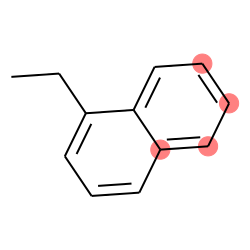

In [41]:
from rdkit.Chem.Draw import IPythonConsole
m = Chem.MolFromSmiles('CCc1cccc2ccccc21')
AllChem.ComputeGasteigerCharges(m)
# Get substructure match 
substructure = Chem.MolFromSmarts('cc') # Aromatic carbons 
print(m.GetSubstructMatches(substructure))
# you can also manually set the atoms that should be highlighted:
m.__sssAtoms = [2,3,4,5]
m.__sssAtoms = [6,7,8,9]

In [42]:
ListOfTwoAtomFeatures = m.GetSubstructMatches(substructure)

In [46]:
for i in ListOfTwoAtomFeatures:
    print(i)

(2, 3)
(2, 11)
(3, 4)
(4, 5)
(5, 6)
(6, 7)
(6, 11)
(7, 8)
(8, 9)
(9, 10)
(10, 11)


In [30]:
q = rdqueries.IsAromaticQueryAtom()
print([x.GetIdx() for x in m.GetAtomsMatchingQuery(q)]) # These match the indices of the atoms that match the 


[2, 3, 4, 5, 6, 7, 8, 9, 10, 11]


((3, 4, 5), (8, 9, 7))


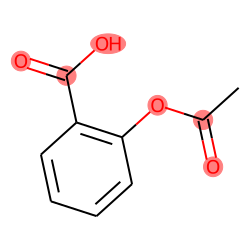

In [38]:
m = Chem.MolFromSmiles('c1cc(C(=O)O)c(OC(=O)C)cc1')
substructure = Chem.MolFromSmarts('C(=O)O')
print(m.GetSubstructMatches(substructure))
m